In [1]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import numpy as np
import re
import matplotlib
from matplotlib import pyplot as plt

In [2]:
file = open("GooglePlaystore.xlsx")
df = pd.read_excel("GooglePlaystore.xlsx")

**Preprocessing**

Remove outlier Reviews = 3.0M

In [3]:
df = df.query('Reviews != "3.0M"')
df["Reviews"] = df["Reviews"].astype(int)

remove rows where any of the columns has "varies with device"

In [4]:
df = df[~df.isin(['Varies with device']).any(axis = 1)]

Android version column should all be floats. + Strip trailing non-numeric characters from all values (ie. the words " and up"If there are multiple decimal places (eg. “x.y.z”), keep only the first two parts (eg “x.y”). For example, the value “4.1 and up” should be changed to “4.1”. The value “4.5.6 and up” should be changed to “4.5”. The value “5.6.7” should be changed to “5.6”. If there is a range only consider the first number

In [5]:
androidList = df["Android Ver"].values #list of values in column
for i in range(androidList.size):
    m = re.match(r'\d\.\d', str(androidList[i]))
    if m != None:
        androidList[i] = m.group(0)


"Installs" column must have int values. remove commas, remove + at end

In [6]:
df["Installs"] = df["Installs"].str.replace('+', '')
df["Installs"] = df["Installs"].str.replace(',', '')
df["Installs"] = df["Installs"].astype(int)

C:\Users\Cynthia - School\AppData\Local\Temp\ipykernel_67528\3602637167.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Installs"] = df["Installs"].str.replace('+', '')


In [7]:
installsList = df["Installs"].values #list
i = 0
for i in range(installsList.size):
    x = str(installsList[i])
    x = x.replace(',', "")
    x = x.replace('+', "")
    installsList[i] = int(x)
df["Installs"].astype(int)


0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
10834        500
10835         10
10836       5000
10837        100
10838       1000
Name: Installs, Length: 9059, dtype: int32

for missing ratings if reviews < 100 & installations < 50000 remove row. else fill with avg. (rounded to 2 decimals)

In [7]:
mean = round(df['Rating'].mean(skipna= True), 2)
#df = df.loc[df["Reviews"] >= 100]
#df = df.loc[df["Installs"] >= 50000]
df = df.query('Reviews >= 100 and Installs >= 50000')
df['Rating'].fillna(mean)

1        3.9
2        4.7
4        4.3
5        4.4
6        3.8
        ... 
10814    4.0
10815    4.2
10817    4.0
10830    3.8
10832    3.8
Name: Rating, Length: 4939, dtype: float64

In [8]:
df["Size"] = df["Size"].str.replace("M", "000000")
df["Size"] = df["Size"].str.replace("K", "000")
df["Size"] = df["Size"].str.replace(r'\.\d0', "", regex=True)

In [9]:
df.groupby("Category").describe()

Rating                                                    \
                     count      mean       std  min    25%   50%    75%  max   
Category                                                                       
ART_AND_DESIGN        38.0  4.318421  0.331137  3.4  4.100  4.35  4.600  4.8   
AUTO_AND_VEHICLES     41.0  4.268293  0.395878  3.2  4.000  4.30  4.500  4.9   
BEAUTY                20.0  4.330000  0.341976  3.7  4.075  4.35  4.625  4.9   
BOOKS_AND_REFERENCE   78.0  4.378205  0.354799  3.3  4.200  4.50  4.600  4.9   
BUSINESS             109.0  4.210092  0.409142  2.7  4.100  4.30  4.500  4.8   
COMICS                30.0  4.146667  0.510398  3.2  3.825  4.30  4.575  4.8   
COMMUNICATION        134.0  4.171642  0.307454  3.0  4.000  4.20  4.400  4.8   
DATING               107.0  3.901869  0.568178  1.9  3.650  4.10  4.200  4.8   
EDUCATION            101.0  4.402970  0.245135  3.5  4.300  4.40  4.600  4.9   
ENTERTAINMENT         85.0  4.143529  0.292545  3.0  4.000  4.20  4.300  4.7   
EVENTS                17.0  4.341176  0.252633  3.7  4.300  4.40  4.500  4.6   
FAMILY               985.0  4.179391  0.406166  1.6  4.000  4.30  4.500  4.9   
FINANCE              129.0  4.233333  0.375694  2.3  4.100  4.30  4.500  4.8   
FOOD_AND_DRINK        70.0  4.155714  0.405626  3.1  3.825  4.20  4.500  4.8   
GAME                 808.0  4.288490  0.304861  2.7  4.200  4.30  4.500  4.9   
HEALTH_AND_FITNESS   161.0  4.336025  0.447151  2.4  4.200  4.50  4.600  4.9   
HOUSE_AND_HOME        50.0  4.158000  0.333864  3.4  4.000  4.20  4.400  4.8   
LIBRARIES_AND_DEMO    33.0  4.190909  0.393989  3.1  4.100  4.20  4.500  4.7   
LIFESTYLE            146.0  3.998630  0.587453  1.6  3.725  4.10  4.400  4.9   
MAPS_AND_NAVIGATION   54.0  4.188889  0.430299  2.8  4.100  4.30  4.475  4.8   
MEDICAL              105.0  4.199048  0.522107  2.6  4.000  4.30  4.600  4.9   
NEWS_AND_MAGAZINES    96.0  4.114583  0.505336  1.7  4.000  4.20  4.400  4.7   
PARENTING             30.0  4.376667  0.374795  3.7  4.025  4.50  4.700  4.9   
PERSONALIZATION      149.0  4.308725  0.268865  3.4  4.100  4.30  4.500  4.8   
PHOTOGRAPHY          185.0  4.202703  0.392654  2.5  4.000  4.30  4.400  4.8   
PRODUCTIVITY         150.0  4.235333  0.355614  2.9  4.100  4.30  4.500  4.8   
SHOPPING             145.0  4.234483  0.307630  3.1  4.100  4.30  4.500  4.7   
SOCIAL               112.0  4.285714  0.316187  3.2  4.100  4.30  4.500  4.9   
SPORTS               175.0  4.211429  0.364653  2.4  4.000  4.30  4.500  4.9   
TOOLS                365.0  4.084110  0.488628  2.0  3.900  4.20  4.400  4.8   
TRAVEL_AND_LOCAL      95.0  4.051579  0.464681  2.5  3.800  4.20  4.400  4.8   
VIDEO_PLAYERS         76.0  4.180263  0.367340  3.3  3.900  4.20  4.425  4.8   
WEATHER               42.0  4.278571  0.310417  3.5  4.200  4.35  4.500  4.8   

                    Reviews                ...                         \
                      count          mean  ...        75%         max   
Category                                   ...                          
ART_AND_DESIGN         38.0  2.283639e+04  ...    8627.25    224399.0   
AUTO_AND_VEHICLES      41.0  1.753139e+04  ...    6090.00    197136.0   
BEAUTY                 23.0  8.040391e+03  ...    6470.50     49790.0   
BOOKS_AND_REFERENCE    79.0  5.122551e+04  ...   49286.00    445756.0   
BUSINESS              109.0  4.930876e+04  ...   29313.00   1002861.0   
COMICS                 31.0  1.875123e+04  ...   13641.00    238970.0   
COMMUNICATION         134.0  8.731307e+05  ...  188803.25  17714850.0   
DATING                107.0  3.637865e+04  ...   33262.50    285838.0   
EDUCATION             102.0  6.935840e+04  ...   99020.00    342918.0   
ENTERTAINMENT          85.0  1.539758e+05  ...  123279.00   1828284.0   
EVENTS                 17.0  4.496471e+03  ...    5839.00     20611.0   
FAMILY                986.0  2.940328e+05  ...   83951.50  44881447.0   
FINANCE               129.0  7.774842e+04  .

In [10]:
def getTopFree(column):
    topFree = df.loc[df["Type"] == "Free"]
    #topfree = df.query("'Type' == 'Free'")
    topFree = topFree.nlargest(3, column)
    return topFree

In [11]:
getTopFree('Rating')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33000000,100000,Free,0,Everyone,Auto & Vehicles,2018-07-18 00:00:00,1.7.1,4.0
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17000000,100000,Free,0,Everyone,Auto & Vehicles,2018-07-03 00:00:00,1.7,4.2
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27000000,100000,Free,0,Everyone,Auto & Vehicles,2018-07-03 00:00:00,1.7,4.2


In [12]:
dfPrice = df.loc[df["Type"] == "Paid"]["Price"]
print(dfPrice.mean())
print(dfPrice.max())
print(dfPrice.min())

10.566194029850754
399.99
0.99


([<matplotlib.patches.Wedge at 0x1edeabf3c40>,
 [Text(1.0742486990412308, 0.23662149650491057, 'Tools'),
  Text(0.9034654587986003, 0.6274951511827281, 'Action'),
  Text(0.6368524184265347, 0.8968940835707826, 'Education'),
  Text(0.29714573343677814, 1.059105477797334, 'Entertainment'),
  Text(-0.012087368985348183, 1.0999335868637763, 'Sports'),
  Text(-0.25540783671416595, 1.0699377724638897, 'Photography'),
  Text(-0.48017140345581827, 0.9896642982866817, 'Casual'),
  Text(-0.670997456563718, 0.8716435127304175, 'Health & Fitness'),
  Text(-0.8257570289015872, 0.7267223191973833, 'Arcade'),
  Text(-0.948518064817956, 0.5570578791418359, 'Simulation'),
  Text(-1.0342565057684094, 0.37458441008098575, 'Productivity'),
  Text(-1.0841655605231593, 0.185970528244407, 'Personalization'),
  Text(-1.0999842819503571, -0.005880430439781026, 'Lifestyle'),
  Text(-1.0825815984826488, -0.19497969798610584, 'Shopping'),
  Text(-1.0355849235256132, -0.37089603147843236, 'Communication'),
  Text(

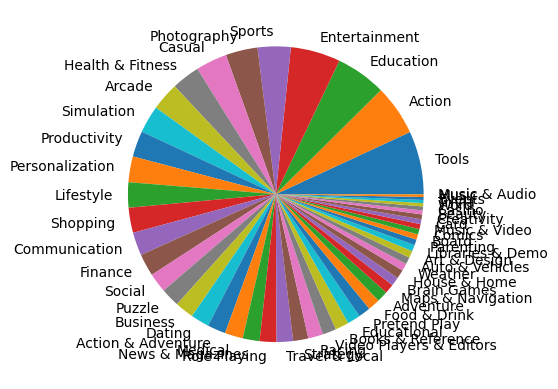

In [13]:
df["Genres"] = df["Genres"].str.split(";")
dfEX = df.explode("Genres")
genres = dfEX["Genres"].value_counts()
gLabels = genres.keys()
gNumbers = genres.values
fig1, ax1 = plt.subplots()
ax1.pie(gNumbers, labels=gLabels)

Text(0, 0.5, 'Ratings')

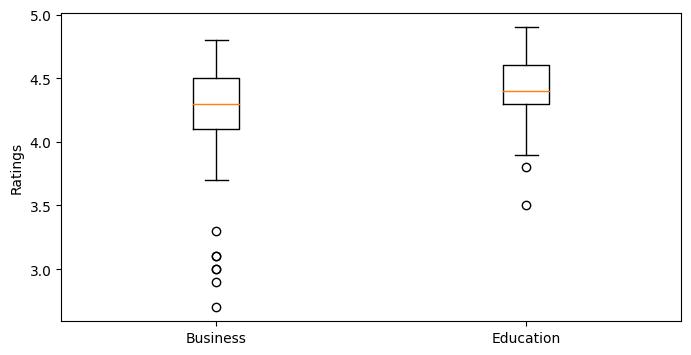

In [30]:
#boxplot
#ratings for business category
#ratings for educatoin category

#dfPlot = df.query('Category == "BUSINESS" or Category == "EDUCATION"')
dfBusiness = df.loc[df["Category"] == "BUSINESS"]
dfEdu = df.loc[df["Category"] == "EDUCATION"].dropna()

# slightly better plot, boxes steered away from edges, descriptive x-labels on each
plt.figure(figsize=(8, 4))
#print(dfEdu["Rating"].values)
plt.boxplot([dfBusiness["Rating"], dfEdu["Rating"]],labels=('Business','Education'))
plt.ylabel('Ratings')
